<a href="https://colab.research.google.com/github/DyegoTkrD/MachineLearning_Alura/blob/main/Machine_learning_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando e conhecendo os dados

In [2]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [3]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [4]:
URI = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'
dados = pd.read_csv(URI)

In [5]:
dados.shape

(7043, 18)

In [6]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


#Alterando os tipos de dados

In [7]:
#Modificação manual
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [8]:
dumies_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], 
                                         axis=1))

In [9]:
dados_final = pd.concat([dadosmodificados, dumies_dados], axis=1)

In [10]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
dados_final.shape

(7043, 39)

# Balanceando os dados

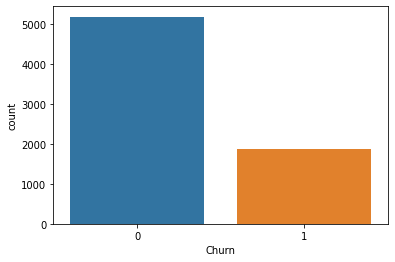

In [12]:
ax = sns.countplot(x='Churn', data=dados_final)

In [13]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [14]:
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [15]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0


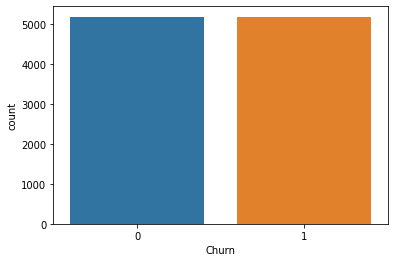

In [16]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

# Utilizando o primeiro modelo machine Learning


## Separando os dados em treino e teste do modelo
 Utilizado 30% da base para treinar o modelo

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Instanciando o modelo
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

## Utilizando NeighborsClassifier

  IA que classifica dentro de os dados por proximidade

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
#Criar o modelo
knn = KNeighborsClassifier(metric='euclidean')

In [22]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [23]:
predito_knn = knn.predict(X_teste)

In [24]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

### Utilizando o Bernoulli


In [25]:
from sklearn.naive_bayes import BernoulliNB

In [32]:
bnb = BernoulliNB(binarize=0.44)

In [33]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.44)

In [34]:
predito_bnb = bnb.predict(X_teste)

## Utilizando a DecisionTree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [43]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [44]:
predito_dtc = dtc.predict(X_teste)

# Validando os resultados




In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

## Knn


In [27]:
print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


In [31]:
print(accuracy_score(y_teste, predito_knn)*100)

81.48148148148148


In [39]:
print(precision_score(y_teste, predito_knn)*100)

79.75232198142415


In [52]:
print(f1_score(y_teste, predito_knn)*100)

81.75182481751825


## BNB


In [35]:
print(confusion_matrix(y_teste, predito_bnb))

[[1084  485]
 [ 238 1298]]


In [36]:
print(accuracy_score(y_teste, predito_bnb)*100)

76.71497584541062


In [38]:
print(precision_score(y_teste, predito_bnb)*100)

72.79865395401009


In [60]:
print(f1_score(y_teste, predito_bnb)*100)

78.21633021994577


In [59]:
print(recall_score(y_teste, predito_bnb)*100)

84.50520833333334


## Decision Tree

In [45]:
print(confusion_matrix(y_teste, predito_dtc))

[[1250  319]
 [ 275 1261]]


In [46]:
print(accuracy_score(y_teste, predito_dtc)*100)

80.8695652173913


In [47]:
print(precision_score(y_teste, predito_dtc)*100)

79.81012658227849


In [51]:
print(f1_score(y_teste, predito_knn)*100)

81.75182481751825


In [58]:
print(recall_score(y_teste, predito_knn)*100)

83.85416666666666


## Validando os modelos

In [55]:
predito = [0,0,0,0,1,1,1,1,0,1,0,1]
real = [1,1,0,0,1,1,1,0,1,0,1,0]

In [57]:
print(recall_score(real, predito)*100)
print(f1_score(real, predito)*100)

42.857142857142854
46.15384615384615
